In [3]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig

%matplotlib notebook

In [4]:
dfiles = [['transfer/b-foot/2201_openstart.aup',
          'transfer/b-foot/2201_closing_1.aup',
          'transfer/b-foot/2201_closing_2.aup',
          'transfer/b-foot/2201_closing_3.aup',
          'transfer/b-foot/2201_closing_4.aup',
          'transfer/b-foot/2201_closing_5.aup',
          'transfer/b-foot/2201_closing_6.aup',
          'transfer/b-foot/2201_closing_7.aup',
          'transfer/b-foot/2201_closing_8.aup',
          'transfer/b-foot/2201_closing_9.aup',
          'transfer/b-foot/2201_closing_10.aup',
          'transfer/b-foot/2201_closing_11.aup',
          'transfer/b-foot/2201_closing_12.aup',
          'transfer/b-foot/2201_closing_13.aup',
          'transfer/b-foot/2201_closing_14.aup',
          'transfer/b-foot/2201_closing_15.aup',
          'transfer/b-foot/2201_closing_16.aup'],
           ['transfer/b-foot/2301_openstart.aup',
          'transfer/b-foot/2301_closing_1.aup',
          'transfer/b-foot/2301_closing_2.aup',
          'transfer/b-foot/2301_closing_3.aup',
          'transfer/b-foot/2301_closing_4.aup',
          'transfer/b-foot/2301_closing_5.aup',
          'transfer/b-foot/2301_closing_6.aup',
          'transfer/b-foot/2301_closing_7.aup',
          'transfer/b-foot/2301_closing_8.aup',
          'transfer/b-foot/2301_closing_9.aup',
          'transfer/b-foot/2301_closing_10.aup',
          'transfer/b-foot/2301_closing_11.aup',
          'transfer/b-foot/2301_closing_12.aup',
          'transfer/b-foot/2301_closing_13.aup',
          'transfer/b-foot/2301_closing_14.aup',
          'transfer/b-foot/2301_closing_15.aup',
          'transfer/b-foot/2301_closing_16.aup'],
           ['transfer/b-foot/2301-2_openstart.aup',
          'transfer/b-foot/2301-2_closing_1.aup',
          'transfer/b-foot/2301-2_closing_2.aup',
          'transfer/b-foot/2301-2_closing_3.aup',
          'transfer/b-foot/2301-2_closing_4.aup',
          'transfer/b-foot/2301-2_closing_5.aup',
          'transfer/b-foot/2301-2_closing_6.aup',
          'transfer/b-foot/2301-2_closing_7.aup',
          'transfer/b-foot/2301-2_closing_8.aup',
          'transfer/b-foot/2301-2_closing_9.aup',
          'transfer/b-foot/2301-2_closing_10.aup',
          'transfer/b-foot/2301-2_closing_11.aup',
          'transfer/b-foot/2301-2_closing_12.aup',
          'transfer/b-foot/2301-2_closing_13.aup',
          'transfer/b-foot/2301-2_closing_14.aup',
          'transfer/b-foot/2301-2_closing_15.aup',
          'transfer/b-foot/2301-2_closing_16.aup']]

In [5]:
testfiles = [['transfer/b-foot/2401_senstest_0.aup',
          'transfer/b-foot/2401_senstest_1.aup',
          'transfer/b-foot/2401_senstest_2.aup',
          'transfer/b-foot/2401_senstest_3.aup',
          'transfer/b-foot/2401_senstest_4.aup',
          'transfer/b-foot/2401_senstest_5.aup',
          'transfer/b-foot/2401_senstest_6.aup',
          'transfer/b-foot/2401_senstest_7.aup',
          'transfer/b-foot/2401_senstest_8.aup',
          'transfer/b-foot/2401_senstest_9.aup',
          'transfer/b-foot/2401_senstest_10.aup',
          'transfer/b-foot/2401_senstest_11.aup',
          'transfer/b-foot/2401_senstest_12.aup',
          'transfer/b-foot/2401_senstest_13.aup',
          'transfer/b-foot/2401_senstest_14.aup',
          'transfer/b-foot/2401_senstest_15.aup',
          'transfer/b-foot/2401_senstest_16.aup'],
            ['transfer/b-foot/2401_senstest_0.aup',
          'transfer/b-foot/2401-2_senstest_1.aup',
          'transfer/b-foot/2401-2_senstest_2.aup',
          'transfer/b-foot/2401-2_senstest_3.aup',
          'transfer/b-foot/2401-2_senstest_4.aup',
          'transfer/b-foot/2401-2_senstest_5.aup',
          'transfer/b-foot/2401-2_senstest_6.aup',
          'transfer/b-foot/2401-2_senstest_7.aup',
          'transfer/b-foot/2401-2_senstest_8.aup',
          'transfer/b-foot/2401-2_senstest_9.aup',
          'transfer/b-foot/2401-2_senstest_10.aup',
          'transfer/b-foot/2401-2_senstest_11.aup',
          'transfer/b-foot/2401-2_senstest_12.aup',
          'transfer/b-foot/2401-2_senstest_13.aup',
          'transfer/b-foot/2401-2_senstest_14.aup',
          'transfer/b-foot/2401-2_senstest_15.aup',
          'transfer/b-foot/2401-2_senstest_16.aup']]

In [6]:
ch1 = [[],[],[]]
ch2 = [[],[],[]]
ch3 = [[],[],[]]

for n in range(3):
    for file in dfiles[n]:
        au = audacity.Aup(file)
        ch1[n].append(au.get_channel_data(1)) 
        ch2[n].append(au.get_channel_data(2))
        ch3[n].append(au.get_channel_data(3))

In [11]:
sensorRMS = [[],[],[],[],[]]
fsens=9820
for n in range(3):
    for sensorsig in ch1[n]:
        #sensorRMS[n].append(np.sqrt(np.mean((sensorsig-np.mean(sensorsig))**2)))
        sensorRMS[n].append(np.mean(np.abs(sut.Heterodyn(sensorsig,fsens,sr=au.rate,nwind=32)[0])))
        
for k, test in enumerate(testfiles):
    for file in test:
        testf = audacity.Aup(file)
        sensortest = testf.get_channel_data(0)
        sensorRMS[k+3].append(np.mean(np.abs(sut.Heterodyn(sensortest,fsens,sr=testf.rate,nwind=32)[0])))

<IPython.core.display.Javascript object>


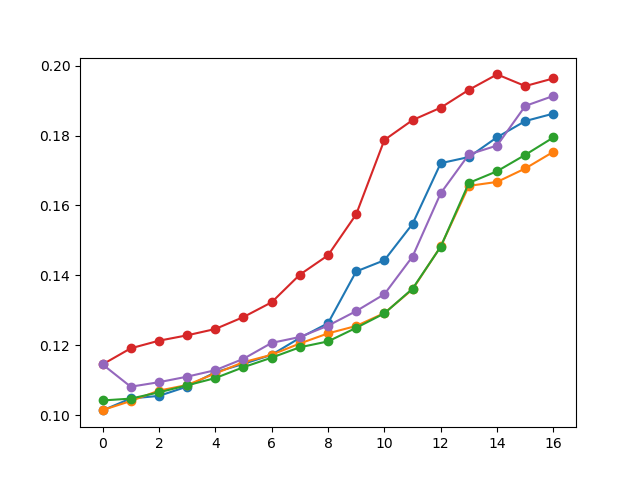

In [12]:
plt.figure()
plt.plot(sensorRMS[0], 'o-')
plt.plot(sensorRMS[1], 'o-')
plt.plot(sensorRMS[2], 'o-')
plt.plot(sensorRMS[3], 'o-')
plt.plot(sensorRMS[4], 'o-')

<IPython.core.display.Javascript object>


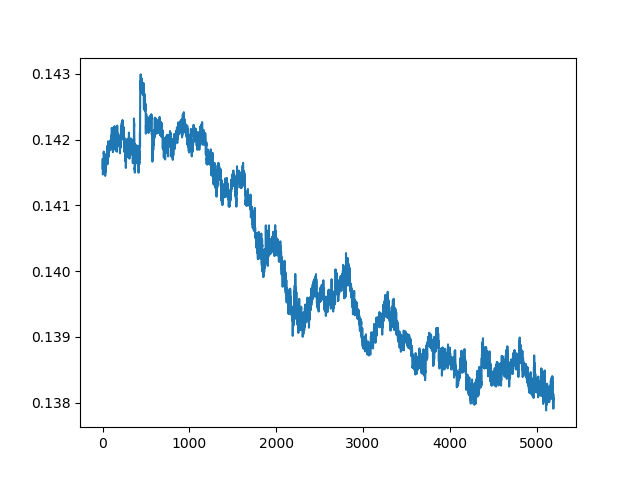

In [24]:
fsens=9820
plt.figure()
plt.plot(np.abs(sut.Heterodyn(ch1[0][9],fsens,sr=au.rate,nwind=32)[0]))

<IPython.core.display.Javascript object>


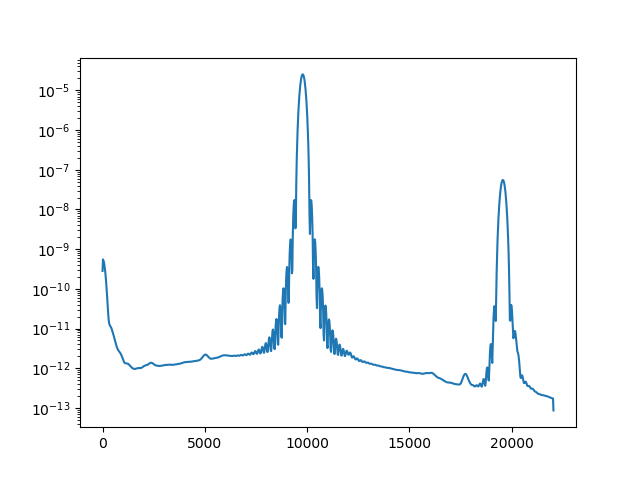

In [29]:
fig,ax=plt.subplots(1)
f1,w1=sig.welch(ch1[0][5],nfft=2048,fs=au.rate,axis=-1)
ax.semilogy(f1,w1)

<IPython.core.display.Javascript object>


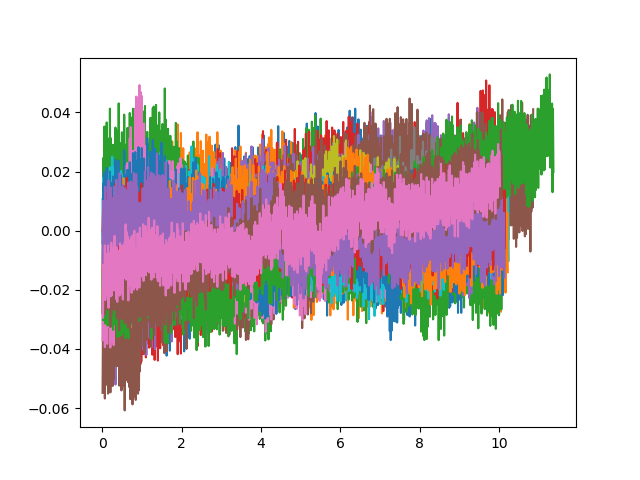

In [21]:
plt.figure()

k=0
test=testfiles[k]
for file in test:
    testf = audacity.Aup(file)
    sensortest = testf.get_channel_data(0)
    x,t=sut.Heterodyn(sensortest,fsens,sr=testf.rate,nwind=2**10)
    xm = np.mean(np.abs(x))
    plt.plot(t,np.abs(x)/xm-1)


In [15]:
Dbore = 0.0188
Lfoot = 0.1570
V=(np.pi*Dbore**2/4)*Lfoot

In [28]:
sut.Heterodyn

AttributeError: module 'SoundUtils' has no attribute 'Heterodyn'

<IPython.core.display.Javascript object>


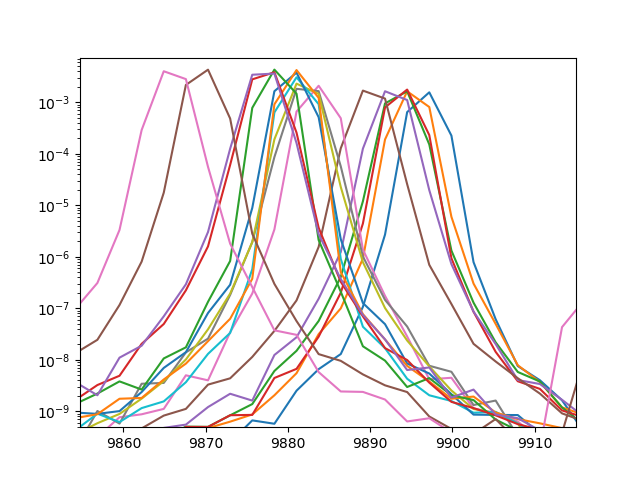

In [25]:
plt.figure()

k=0
test=testfiles[k]
for file in test:
    testf = audacity.Aup(file)
    sensortest = testf.get_channel_data(0)
    f1,w1=sig.welch(sensortest[:2**16],nperseg=2**14,fs=au.rate,axis=-1)
    plt.semilogy(f1,w1)    
